In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
import math

In [2]:
quantmodelDir = '/users/hgmartin/libraries/quantmodel'

%matplotlib inline

import sys, os
pythonPath = quantmodelDir+"/code/core"
if pythonPath not in sys.path:
    sys.path.append(pythonPath)
os.environ["QUANTMODELPATH"] = quantmodelDir


(200000,)


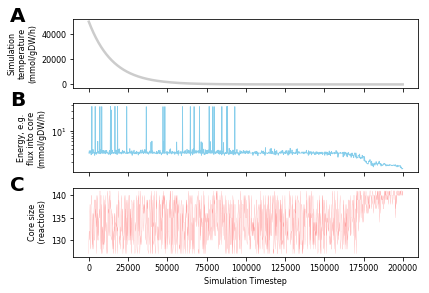

In [38]:
# Load the dataframe
df0 = pd.read_csv('test_data/logs/1.csv', sep=',', names= ['energy', 'size'],skiprows=1)
df1 = pd.DataFrame({'timestep': range(1,1+df0.index.size)}) 

# Set temp schedule to match generated results
startingTemp = 50000
finalTemp = 0.1
Tfactor = -math.log(startingTemp / finalTemp)
steps = df0.shape[0]
schedule = pd.Series([startingTemp * math.exp(Tfactor * step / steps) for step in range(0,steps)])

print((schedule).shape)
df2 = pd.DataFrame({'temperature': schedule }) 
df3 = df0.join(df1)
df3 = df3.join(df2)

# Initialize BIG figure
fig = plt.figure(1, [20, 4])   

plt.rcParams.update({'font.size': 8})

# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(3, sharex=True)

# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
axarr[0].text(-50000, 1.0*max(df3['temperature']), 'A', size=20, weight='bold')
axarr[0].plot('timestep','temperature',data=df3.iloc[::150, :],color='grey',alpha=.4,lw=2.5)
axarr[0].set_ylabel('Simulation\ntemperature\n(mmol/gDW/h)')

axarr[1].text(-50000, 1.0*max(df3['energy']), 'B', size=20, weight='bold')
axarr[1].semilogy('timestep','energy',data=df3.iloc[::150, :],color='skyblue', linewidth=0.8)

axarr[1].set_ylabel('Energy, e.g.\nflux into core\n(mmol/gDW/h)')
#axarr[1].plot('timestep','energy',data=df3.iloc[::150, :],color='black',alpha=.1,lw=.1)

axarr[2].text(-50000, 1.0*max(df3['size']), 'C', size=20, weight='bold')
axarr[2].plot('timestep','size',data=df3.iloc[::150, :],color='red',alpha=.8,lw=0.1)
#axarr[2].plot('timestep','size',data=df3.iloc[::150, :],color='black',alpha=.1,lw=.1)
axarr[2].set_xlabel('Simulation Timestep')
axarr[2].set_ylabel('Core size\n (reactions)')
# axarr[2].set_ylim([-1,175])

plt.tight_layout()
plt.savefig("fig4-v3.pdf")